# Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
df = pd.read_csv("./data/austin_car_crash_cleaned.csv") 

C:\Users\hungt\AppData\Local\Temp\ipykernel_23636\4047017023.py:2: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [3]:
display(df.head())
display(df.shape)

,ID,Crash ID,crash_fatal_fl,case_id,Primary address,Secondary address,rpt_block_num,rpt_street_name,rpt_street_sfx,crash_speed_limit,...,micromobility_serious_injury_count,micromobility_death_count,Crash timestamp (US/Central),Crash timestamp,Is deleted,Is temporary record,Law enforcement fatality count,Reported street prefix,Estimated Maximum Comprehensive Cost,Estimated Total Comprehensive Cost
0,727,13650732.0,False,140080135,8000 NOT REPORTED HWY,ROYAL PALMS DR,8000,NOT REPORTED,HWY,-1.0,...,0,0,01/08/2014 02:34:00 AM,01/08/2014 08:34:00 AM,False,False,0,NaN,20000,20000
1,849,13653672.0,False,140101374,NOT REPORTED,AIRPORT BLVD BLVD,NaN,NOT REPORTED,NaN,-1.0,...,0,0,01/10/2014 05:34:00 PM,01/10/2014 11:34:00 PM,False,False,0,NaN,250000,290000
2,1417,13668262.0,False,140141596,ANTHONY ST,HOLLY ST,NaN,ANTHONY,ST,30.0,...,0,0,01/14/2014 07:25:00 PM,01/15/2014 01:25:00 AM,False,False,0,NaN,20000,40000
3,1295,13665836.0,False,140080823,2800 N LAMAR BLVD,SAN GABRIEL ST,2800,LAMAR,BLVD,35.0,...,0,0,01/08/2014 01:35:00 PM,01/08/2014 07:35:00 PM,False,False,0,NaN,200000,820000
4,1662,13671385.0,False,140190466,1800 LAVACA ST,W 18TH ST,1800,LAVACA,ST,30.0,...,0,0,01/19/2014 05:31:00 AM,01/19/2014 11:31:00 AM,False,False,0,NaN,20000,20000


(216088, 45)

216088 rows and 45 columns

In [4]:
display(df.isnull().sum())

ID                                           0
Crash ID                                     6
crash_fatal_fl                               0
case_id                                   2909
Primary address                              0
Secondary address                            2
rpt_block_num                            29058
rpt_street_name                              1
rpt_street_sfx                           66739
crash_speed_limit                            4
road_constr_zone_fl                          6
latitude                                  3549
longitude                                 3550
crash_sev_id                                 0
sus_serious_injry_cnt                        0
nonincap_injry_cnt                           0
poss_injry_cnt                               0
non_injry_cnt                                0
unkn_injry_cnt                               0
tot_injry_cnt                                0
death_cnt                                    0
units_involve

# Rows Selection and Value Conversion

Remove any rows that have `Is temporary record` == True

In [5]:
print(df['Is temporary record'].value_counts())

Is temporary record
False    216082
True          6
Name: count, dtype: int64


In [6]:
df = df[df['Is temporary record'] != True]

In [7]:
print(df['Is temporary record'].value_counts())

Is temporary record
False    216082
Name: count, dtype: int64


#### 2. Speed limit grouping

- Drop negative values, reassign all to groups of mutiples of 5. 

In [8]:
df['crash_speed_limit'].value_counts()

crash_speed_limit
-1.0     38441
 35.0    33143
 45.0    28105
 55.0    20365
 30.0    19001
 65.0    16459
 40.0    14274
 50.0    11613
 0.0     11335
 60.0    10466
 70.0     6899
 25.0     3279
 75.0     1127
 15.0      524
 20.0      456
 10.0      236
 80.0      223
 5.0        96
 34.0       11
 85.0        8
 36.0        4
 6.0         4
 24.0        2
 58.0        1
 66.0        1
 39.0        1
 79.0        1
 51.0        1
 53.0        1
 42.0        1
 32.0        1
 7.0         1
 64.0        1
 56.0        1
Name: count, dtype: int64

In [9]:
#replace -1 and 0 with NaN. 
df['crash_speed_limit'] = df['crash_speed_limit'].replace(-1, np.nan)
df['crash_speed_limit'] = df['crash_speed_limit'].replace(0, np.nan)

In [10]:
#drop NaN
df = df.dropna(subset=['crash_speed_limit'])

In [11]:
display(df.shape)

(166306, 45)

In [12]:
# rounds up to the nearest multiple of 5
df['crash_speed_limit'] = (np.ceil(df['crash_speed_limit'] / 5) * 5).astype(int)

In [13]:
df['crash_speed_limit'].value_counts()

crash_speed_limit
35    33155
45    28106
55    20367
30    19001
65    16460
40    14279
50    11613
60    10468
70     6900
25     3281
75     1127
15      524
20      456
10      241
80      224
5        96
85        8
Name: count, dtype: int64

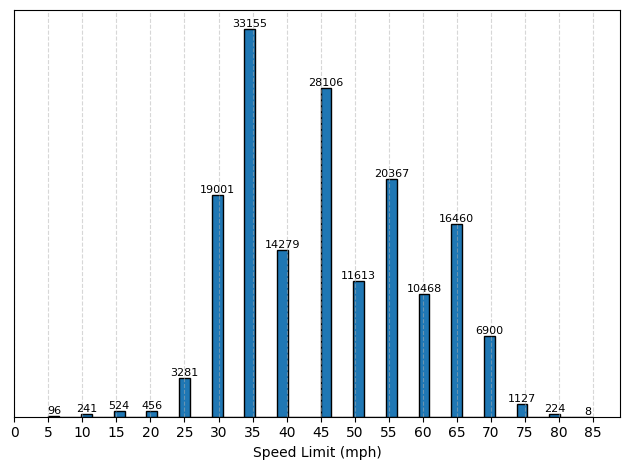

In [14]:
# Create the histogram
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df['crash_speed_limit'], bins=50, edgecolor='black')

# Set x-axis ticks at 5-mph intervals
plt.xticks(np.arange(0, df['crash_speed_limit'].max() + 5, 5))

# Add labels on top of each bar
for count, patch in zip(counts, patches):
    if count > 0:  # Show labels only for non-zero bars
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.text(x, y, int(count), ha='center', va='bottom', fontsize=8)
        
# Hide y-axis
ax.get_yaxis().set_visible(False)

# Optional: styling
plt.xlabel("Speed Limit (mph)")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 3. Crash Severity

- Orginally label 5 as No Injured and 4 as Killed. Reverse it so 0 will be no injured, 5 is Killed

In [15]:
print(df['crash_sev_id'].value_counts())

crash_sev_id
5    78314
3    35858
2    34256
0    11761
1     5077
4     1040
Name: count, dtype: int64


In [16]:
# Original: (0=UNKNOWN, 1=INCAPACITATING INJURY, 2=NON-INCAPACITATING INJURY, 3=POSSIBLE INJURY, 4=KILLED, 5=NOT INJURED)
# We want to change it to (0=NOT INJURED, 1=UNKNOWN,  2=POSSIBLE INJURY, 3=NON-INCAPACITATING INJURY, 4=INCAPACITATING INJURY, 5=KILLED)

severity_mapping = {
    0: 1,  # UNKNOWN → becomes 1 (UNKNOWN)
    1: 4,  # INCAPACITATING INJURY → becomes 4
    2: 3,  # NON-INCAPACITATING INJURY → becomes 3
    3: 2,  # POSSIBLE INJURY → becomes 2
    4: 5,  # KILLED → becomes 5
    5: 0   # NOT INJURED → becomes 0
}

# Apply the mapping
df['crash_sev_id'] = df['crash_sev_id'].replace(severity_mapping)

In [17]:
print(df['crash_sev_id'].value_counts())

crash_sev_id
0    78314
2    35858
3    34256
1    11761
4     5077
5     1040
Name: count, dtype: int64


In [18]:
display(df.shape)

(166306, 45)

In [19]:
severity_map = {
    0: "Not Injured",
    1: "Unknown",
    2: "Possible Injury",
    3: "Non-Incapacitating Injury",
    4: "Incapacitating Injury",
    5: "Killed"
}

df["crash_sev_id"] = df["crash_sev_id"].map(severity_map)
df = pd.get_dummies(df, columns=["crash_sev_id"], prefix="severity")


In [20]:
cols_to_convert = [
    'severity_Incapacitating Injury',
    'severity_Killed',
    'severity_Non-Incapacitating Injury',
    'severity_Not Injured',
    'severity_Possible Injury',
    'severity_Unknown'
]

df[cols_to_convert] = df[cols_to_convert].astype(int)


In [21]:
display(df.shape)

(166306, 50)

In [22]:
display(df)

,ID,Crash ID,crash_fatal_fl,case_id,Primary address,Secondary address,rpt_block_num,rpt_street_name,rpt_street_sfx,crash_speed_limit,...,Law enforcement fatality count,Reported street prefix,Estimated Maximum Comprehensive Cost,Estimated Total Comprehensive Cost,severity_Incapacitating Injury,severity_Killed,severity_Non-Incapacitating Injury,severity_Not Injured,severity_Possible Injury,severity_Unknown
2,1417,13668262.0,False,140141596,ANTHONY ST,HOLLY ST,NaN,ANTHONY,ST,30,...,0,NaN,20000,40000,0,0,0,1,0,0
3,1295,13665836.0,False,140080823,2800 N LAMAR BLVD,SAN GABRIEL ST,2800,LAMAR,BLVD,35,...,0,NaN,200000,820000,0,0,0,0,1,0
4,1662,13671385.0,False,140190466,1800 LAVACA ST,W 18TH ST,1800,LAVACA,ST,30,...,0,NaN,20000,20000,0,0,0,0,0,1
5,187,13634899.0,False,140080926,7500 NOT REPORTED,CONVICT HILL RD,7500,NOT REPORTED,NaN,65,...,0,NaN,20000,60000,0,0,0,1,0,0
7,1246,13664757.0,False,C314-0122-001,3400 W SLAUGHTER LN LN,SLAUGHTER LN,3400,SLAUGHTER LN,LN,45,...,0,NaN,200000,260000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216083,1355943,20694969.0,False,250630283,7700 ED BLUESTEIN BLVD SVRD SB,7400 E US 290 HWY SVRD WB,7700,ED BLUESTEIN BLVD SVRD SB,NaN,55,...,0,NaN,250000,310000,0,0,1,0,0,0
216084,1355690,20689022.0,False,250660127,6036 N N IH 35 SVRD SB AT E 290 TRN,NOT REPORTED,6036,N IH 35 SVRD SB AT E 290 TRN,NaN,50,...,0,NaN,20000,20000,0,0,0,0,0,1
216085,1356120,20696405.0,False,C2-25044,10200 US 183,SL 360,10200,US 183,NaN,65,...,0,NaN,20000,60000,0,0,0,1,0,0
216086,1356073,20695069.0,False,250430835,BURNET RD RD,GRACIE KILTZ LN LN,NaN,BURNET RD,RD,45,...,0,NaN,20000,40000,0,0,0,1,0,0


#### 4. Convert Crash_Fatal + Onsys_Fl + road_constr_zone_fl from T/F to binary

In [23]:
#road_constr_zone_fl has 0 value, I think they are missing value so I gonna assume they gonna be False. 
print(df['road_constr_zone_fl'].value_counts())

df['road_constr_zone_fl'] = df['road_constr_zone_fl'].astype(str).str.upper()

df['road_constr_zone_fl'] = df['road_constr_zone_fl'].replace({
    'TRUE': 1,
    'FALSE': 0,
    '0': 0
})

bool_cols = ['road_constr_zone_fl', 'crash_fatal_fl', 'onsys_fl']
df[bool_cols] = df[bool_cols].astype(int)
print(df['road_constr_zone_fl'].value_counts())

road_constr_zone_fl
False    157608
True       8698
Name: count, dtype: int64
road_constr_zone_fl
0    157608
1      8698
Name: count, dtype: int64


C:\Users\hungt\AppData\Local\Temp\ipykernel_23636\72527144.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['road_constr_zone_fl'] = df['road_constr_zone_fl'].replace({


In [24]:
print(df['crash_fatal_fl'].value_counts())
print(df['onsys_fl'].value_counts())

crash_fatal_fl
0    165266
1      1040
Name: count, dtype: int64
onsys_fl
1    83935
0    82371
Name: count, dtype: int64


In [25]:
display(df.shape)

(166306, 50)

In [26]:
display(df.isnull().sum())

ID                                           0
Crash ID                                     0
crash_fatal_fl                               0
case_id                                   2686
Primary address                              0
Secondary address                            1
rpt_block_num                            20008
rpt_street_name                              1
rpt_street_sfx                           51417
crash_speed_limit                            0
road_constr_zone_fl                          0
latitude                                  2708
longitude                                 2709
sus_serious_injry_cnt                        0
nonincap_injry_cnt                           0
poss_injry_cnt                               0
non_injry_cnt                                0
unkn_injry_cnt                               0
tot_injry_cnt                                0
death_cnt                                    0
units_involved                               0
point        

### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Columns Selection</span>

In [27]:
columns_name = (df.columns.tolist())
print(columns_name)

['ID', 'Crash ID', 'crash_fatal_fl', 'case_id', 'Primary address', 'Secondary address', 'rpt_block_num', 'rpt_street_name', 'rpt_street_sfx', 'crash_speed_limit', 'road_constr_zone_fl', 'latitude', 'longitude', 'sus_serious_injry_cnt', 'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt', 'units_involved', 'point', 'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count', 'bicycle_death_count', 'bicycle_serious_injury_count', 'pedestrian_death_count', 'pedestrian_serious_injury_count', 'motorcycle_death_count', 'motorcycle_serious_injury_count', 'other_death_count', 'other_serious_injury_count', 'onsys_fl', 'private_dr_fl', 'micromobility_serious_injury_count', 'micromobility_death_count', 'Crash timestamp (US/Central)', 'Crash timestamp', 'Is deleted', 'Is temporary record', 'Law enforcement fatality count', 'Reported street prefix', 'Estimated Maximum Comprehensive Cost', 'Estimated Total Comprehensive Cost', 'severity_Incap

In [28]:
len(columns_name)

50

In [29]:
to_drop = [ 'ID', 'Crash ID', 'case_id','Primary address','Secondary address', 'rpt_block_num', 'rpt_street_name', 'rpt_street_sfx',
    'point','private_dr_fl','Crash timestamp', 'Is deleted', 'Is temporary record', 'Reported street prefix', 'Estimated Maximum Comprehensive Cost']
df.drop(to_drop, axis=1, inplace=True)

In [30]:
#to_drop = ['Secondary address','latitude','longitude']
#df.drop(to_drop, axis=1, inplace=True)

In [31]:
columns_name = (df.columns.tolist())
print(columns_name)
len(columns_name)

['crash_fatal_fl', 'crash_speed_limit', 'road_constr_zone_fl', 'latitude', 'longitude', 'sus_serious_injry_cnt', 'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt', 'units_involved', 'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count', 'bicycle_death_count', 'bicycle_serious_injury_count', 'pedestrian_death_count', 'pedestrian_serious_injury_count', 'motorcycle_death_count', 'motorcycle_serious_injury_count', 'other_death_count', 'other_serious_injury_count', 'onsys_fl', 'micromobility_serious_injury_count', 'micromobility_death_count', 'Crash timestamp (US/Central)', 'Law enforcement fatality count', 'Estimated Total Comprehensive Cost', 'severity_Incapacitating Injury', 'severity_Killed', 'severity_Non-Incapacitating Injury', 'severity_Not Injured', 'severity_Possible Injury', 'severity_Unknown']


35

In [32]:
display(df.isnull().sum())

crash_fatal_fl                           0
crash_speed_limit                        0
road_constr_zone_fl                      0
latitude                              2708
longitude                             2709
sus_serious_injry_cnt                    0
nonincap_injry_cnt                       0
poss_injry_cnt                           0
non_injry_cnt                            0
unkn_injry_cnt                           0
tot_injry_cnt                            0
death_cnt                                0
units_involved                           0
motor_vehicle_death_count                0
motor_vehicle_serious_injury_count       0
bicycle_death_count                      0
bicycle_serious_injury_count             0
pedestrian_death_count                   0
pedestrian_serious_injury_count          0
motorcycle_death_count                   0
motorcycle_serious_injury_count          0
other_death_count                        0
other_serious_injury_count               0
onsys_fl   

### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Drop NaN</span>

In [33]:
df = df.dropna()
display(df.shape)

(163597, 35)

In [34]:
display(df.head())

,crash_fatal_fl,crash_speed_limit,road_constr_zone_fl,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,...,micromobility_death_count,Crash timestamp (US/Central),Law enforcement fatality count,Estimated Total Comprehensive Cost,severity_Incapacitating Injury,severity_Killed,severity_Non-Incapacitating Injury,severity_Not Injured,severity_Possible Injury,severity_Unknown
3,0,35,0,30.244344,-97.781309,0,0,4,1,0,...,0,01/08/2014 01:35:00 PM,0,820000,0,0,0,0,1,0
4,0,30,0,30.280295,-97.740912,0,0,0,0,1,...,0,01/19/2014 05:31:00 AM,0,20000,0,0,0,0,0,1
5,0,65,0,30.216696,-97.848713,0,0,0,3,0,...,0,01/08/2014 02:30:00 PM,0,60000,0,0,0,1,0,0
7,0,45,0,30.182598,-97.847707,0,0,1,3,0,...,0,01/22/2014 08:34:00 AM,0,260000,0,0,0,0,1,0
9,0,60,0,30.290776,-97.828303,0,0,0,2,0,...,0,01/02/2014 11:41:00 AM,0,40000,0,0,0,1,0,0


### <span style="background-color: #FF0000; padding: 2px 4px; border-radius: 4px;">Crash Timestamp Transformation</span>

### 🕒 Timestamp Feature Extraction for Machine Learning

**Description**  
Extracts various features from a Pandas Series of timestamps for machine learning purposes.

**Arguments**
- `timestamps`: A Pandas Series containing `datetime` objects or strings that can be converted to `datetime`.

**Returns**  
A Pandas DataFrame with the following extracted features:

| Feature         | Description                                               |
|----------------|-----------------------------------------------------------|
| `hour`          | Hour of the day (0–23)                                    |
| `day_of_week`   | Day of the week (Monday = 0, Sunday = 6)                  |
| `month`         | Month of the year (1–12)                                  |
| `year`          | Year                                                     |
| `day_of_month`  | Day of the month (1–31)                                   |
| `weekend`       | Binary indicator (`1` if weekend, `0` if weekday)         |
| `hour_sin`      | Sine of the hour (for cyclical representation)            |
| `hour_cos`      | Cosine of the hour (for cyclical representation)          |
| `month_sin`     | Sine of the month (for cyclical representation)           |
| `month_cos`     | Cosine of the month (for cyclical representation)         |


In [35]:
df["Crash timestamp (US/Central)"] = pd.to_datetime(df["Crash timestamp (US/Central)"], format="%m/%d/%Y %I:%M:%S %p")

In [36]:
import pandas as pd
import numpy as np

def extract_timestamp_features(timestamps: pd.Series) -> pd.DataFrame:
    if not isinstance(timestamps, pd.Series):
        raise ValueError("Input must be a Pandas Series.")
    if not pd.api.types.is_datetime64_any_dtype(timestamps):
        raise ValueError("Input Series must contain datetime objects.")

    extracted_features = pd.DataFrame(index=timestamps.index)
    extracted_features['hour'] = timestamps.dt.hour
    extracted_features['day_of_week'] = timestamps.dt.dayofweek
    extracted_features['month'] = timestamps.dt.month
    extracted_features['year'] = timestamps.dt.year
    extracted_features['day_of_month'] = timestamps.dt.day
    extracted_features['weekend'] = (timestamps.dt.dayofweek >= 5).astype(int)
    extracted_features['hour_sin'] = np.sin(2 * np.pi * extracted_features['hour'] / 24)
    extracted_features['hour_cos'] = np.cos(2 * np.pi * extracted_features['hour'] / 24)
    extracted_features['month_sin'] = np.sin(2 * np.pi * extracted_features['month'] / 12)
    extracted_features['month_cos'] = np.cos(2 * np.pi * extracted_features['month'] / 12)
    return extracted_features

# Assuming your DataFrame is called 'df' and the timestamp column is 'Crash timestamp (US/Central)'
# First, ensure the timestamp column is in datetime format (as discussed previously)
df["Crash timestamp (US/Central)"] = pd.to_datetime(df["Crash timestamp (US/Central)"], format="%m/%d/%Y %I:%M:%S %p")

# Extract the timestamp features into a new DataFrame
timestamp_features = extract_timestamp_features(df["Crash timestamp (US/Central)"])

# Concatenate the extracted features with the original DataFrame
df = pd.concat([df, timestamp_features], axis=1)

# Drop the original 'Crash timestamp (US/Central)' column
#df = df.drop("Crash timestamp (US/Central)", axis=1)


In [37]:
display(df.shape)

(163597, 45)

In [38]:
display(df.head())

,crash_fatal_fl,crash_speed_limit,road_constr_zone_fl,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,...,hour,day_of_week,month,year,day_of_month,weekend,hour_sin,hour_cos,month_sin,month_cos
3,0,35,0,30.244344,-97.781309,0,0,4,1,0,...,13,2,1,2014,8,0,-0.258819,-0.965926,0.5,0.866025
4,0,30,0,30.280295,-97.740912,0,0,0,0,1,...,5,6,1,2014,19,1,0.965926,0.258819,0.5,0.866025
5,0,65,0,30.216696,-97.848713,0,0,0,3,0,...,14,2,1,2014,8,0,-0.500000,-0.866025,0.5,0.866025
7,0,45,0,30.182598,-97.847707,0,0,1,3,0,...,8,2,1,2014,22,0,0.866025,-0.500000,0.5,0.866025
9,0,60,0,30.290776,-97.828303,0,0,0,2,0,...,11,3,1,2014,2,0,0.258819,-0.965926,0.5,0.866025


### <span style="background-color: #FF0000; padding: 2px 4px; border-radius: 4px;">Unit Involvement Transformation</span>

1. Drop all categories that have less than 1,000 frequency

2. Extract to 7 different vehicle types, into 7 columns, labeled 1 and 0

In [39]:
#pd.set_option('display.max_rows', None)
print(df['units_involved'].value_counts())
#pd.reset_option('display.max_rows')

units_involved
Passenger car                                                                   56803
Large passenger vehicle & Passenger car                                         55489
Large passenger vehicle                                                         25370
Motor vehicle – other & Passenger car                                            5172
Large passenger vehicle & Motor vehicle – other                                  2555
                                                                                ...  
Large passenger vehicle & Motor vehicle – other & Other/Unknown & Pedestrian        1
Bicycle & Motor vehicle – other & Passenger car                                     1
Bicycle & Large passenger vehicle & Motorcycle                                      1
E-scooter & Large passenger vehicle & Other/Unknown                                 1
Bicycle & Motorcycle & Passenger car                                                1
Name: count, Length: 75, dtype: int64


In [40]:
value_counts = df['units_involved'].value_counts()
infrequent_values = value_counts[value_counts < 1000].index
#print(infrequent_values)
df= df[~df['units_involved'].isin(infrequent_values)].copy()

In [41]:
display(df.shape)

(159232, 45)

In [42]:
print(df['units_involved'].value_counts())

units_involved
Passenger car                                              56803
Large passenger vehicle & Passenger car                    55489
Large passenger vehicle                                    25370
Motor vehicle – other & Passenger car                       5172
Large passenger vehicle & Motor vehicle – other             2555
Passenger car & Pedestrian                                  1861
Motorcycle & Passenger car                                  1660
Large passenger vehicle & Other/Unknown & Passenger car     1606
Bicycle & Passenger car                                     1574
Large passenger vehicle & Pedestrian                        1394
Motorcycle                                                  1392
Motor vehicle – other & Other/Unknown & Passenger car       1121
Large passenger vehicle & Other/Unknown                     1101
Bicycle & Large passenger vehicle                           1081
Large passenger vehicle & Motorcycle                        1053
Name: coun

In [43]:
# Step 1: Get all unique entries from 'units_involved'
unique_entries = df['units_involved'].dropna().unique()

# Step 2: Split and flatten all individual vehicle types
vehicle_types = set()
for entry in unique_entries:
    types = [v.strip() for v in entry.split('&')]
    vehicle_types.update(types)

# Sort for consistency
vehicle_types = sorted(vehicle_types)
vehicle_types


['Bicycle',
 'Large passenger vehicle',
 'Motor vehicle – other',
 'Motorcycle',
 'Other/Unknown',
 'Passenger car',
 'Pedestrian']

In [44]:
# Create binary indicator columns for each vehicle type
for vehicle in vehicle_types:
    df[vehicle] = df['units_involved'].apply(
        lambda x: int(vehicle in x) if pd.notnull(x) else 0
    )

# Show the updated dataframe with the new binary columns
df[ ['units_involved']+vehicle_types]

,units_involved,Bicycle,Large passenger vehicle,Motor vehicle – other,Motorcycle,Other/Unknown,Passenger car,Pedestrian
3,Large passenger vehicle & Passenger car,0,1,0,0,0,1,0
5,Passenger car,0,0,0,0,0,1,0
7,Large passenger vehicle & Passenger car,0,1,0,0,0,1,0
9,Large passenger vehicle,0,1,0,0,0,0,0
10,Large passenger vehicle & Passenger car,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
216083,Large passenger vehicle & Passenger car,0,1,0,0,0,1,0
216084,Passenger car,0,0,0,0,0,1,0
216085,Large passenger vehicle & Passenger car,0,1,0,0,0,1,0
216086,Passenger car,0,0,0,0,0,1,0


In [45]:
df.drop('units_involved', axis=1, inplace=True)


In [46]:
# Move target columns to the end
target_cols = ["Estimated Total Comprehensive Cost"]

# Reorder columns: first all others, then the targets
df = df[[col for col in df.columns if col not in target_cols] + target_cols]

In [47]:
display(df.head())
display(df.shape)

,crash_fatal_fl,crash_speed_limit,road_constr_zone_fl,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,...,month_sin,month_cos,Bicycle,Large passenger vehicle,Motor vehicle – other,Motorcycle,Other/Unknown,Passenger car,Pedestrian,Estimated Total Comprehensive Cost
3,0,35,0,30.244344,-97.781309,0,0,4,1,0,...,0.5,0.866025,0,1,0,0,0,1,0,820000
5,0,65,0,30.216696,-97.848713,0,0,0,3,0,...,0.5,0.866025,0,0,0,0,0,1,0,60000
7,0,45,0,30.182598,-97.847707,0,0,1,3,0,...,0.5,0.866025,0,1,0,0,0,1,0,260000
9,0,60,0,30.290776,-97.828303,0,0,0,2,0,...,0.5,0.866025,0,1,0,0,0,0,0,40000
10,0,30,0,30.499680,-97.793717,0,0,1,0,0,...,0.5,0.866025,0,1,0,0,0,1,0,200000


(159232, 51)

### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Plot Accident Costs</span>

In [48]:
# target_distribution = df['Estimated Total Comprehensive Cost'].value_counts()
# bins = [20000, 100000, 500000, float('inf')]  # Define the cost ranges
# labels = ['20,000 - 100,000', '100,000 - 500,000', 'Over 500,000'] 
# df['cost_group'] = pd.cut(df['Estimated Total Comprehensive Cost'], bins=bins, labels=labels, right=False)
# cost_group_counts = df['cost_group'].value_counts()
# print(cost_group_counts)

In [49]:
# cost_group_percentages = (cost_group_counts / cost_group_counts.sum()) * 100
# print(cost_group_percentages)

In [50]:
# plt.figure(figsize=(8, 5))
# cost_group_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
# plt.title('Distribution of Accident Costs', fontsize=16)
# plt.xlabel('Cost Group', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

# to_drop = ['cost_group']
# df.drop(to_drop, axis=1, inplace=True)

### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Dropping not-needed columns</span>

In [51]:
to_drop = ['Crash timestamp (US/Central)','latitude','longitude']
df.drop(to_drop, axis=1, inplace=True)

In [52]:
to_drop = ["hour", "month", "day_of_week"]
df.drop(to_drop, axis=1, inplace=True)

In [53]:
display(df.head())
display(df.shape)

,crash_fatal_fl,crash_speed_limit,road_constr_zone_fl,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,...,month_sin,month_cos,Bicycle,Large passenger vehicle,Motor vehicle – other,Motorcycle,Other/Unknown,Passenger car,Pedestrian,Estimated Total Comprehensive Cost
3,0,35,0,0,0,4,1,0,4,0,...,0.5,0.866025,0,1,0,0,0,1,0,820000
5,0,65,0,0,0,0,3,0,0,0,...,0.5,0.866025,0,0,0,0,0,1,0,60000
7,0,45,0,0,0,1,3,0,1,0,...,0.5,0.866025,0,1,0,0,0,1,0,260000
9,0,60,0,0,0,0,2,0,0,0,...,0.5,0.866025,0,1,0,0,0,0,0,40000
10,0,30,0,0,0,1,0,0,1,0,...,0.5,0.866025,0,1,0,0,0,1,0,200000


(159232, 45)

In [54]:
# value_counts_dict = {col: df[col].value_counts() for col in df.columns}
# print(value_counts_dict)

### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Splitting</span>

In [55]:
from sklearn.model_selection import train_test_split 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Feature Scaling</span>

In [56]:
columns_name = (df.columns.tolist())
print(columns_name)
len(columns_name)

['crash_fatal_fl', 'crash_speed_limit', 'road_constr_zone_fl', 'sus_serious_injry_cnt', 'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt', 'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count', 'bicycle_death_count', 'bicycle_serious_injury_count', 'pedestrian_death_count', 'pedestrian_serious_injury_count', 'motorcycle_death_count', 'motorcycle_serious_injury_count', 'other_death_count', 'other_serious_injury_count', 'onsys_fl', 'micromobility_serious_injury_count', 'micromobility_death_count', 'Law enforcement fatality count', 'severity_Incapacitating Injury', 'severity_Killed', 'severity_Non-Incapacitating Injury', 'severity_Not Injured', 'severity_Possible Injury', 'severity_Unknown', 'year', 'day_of_month', 'weekend', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'Bicycle', 'Large passenger vehicle', 'Motor vehicle – other', 'Motorcycle', 'Other/Unknown', 'Passenger car', 'Pedestrian', 'Estimated Total Comprehen

45

In [57]:

from sklearn.preprocessing import StandardScaler
numeric_cols_to_scale = [
    'crash_speed_limit',
    'sus_serious_injry_cnt',
    'nonincap_injry_cnt',
    'poss_injry_cnt',
    'non_injry_cnt',
    'unkn_injry_cnt',
    'tot_injry_cnt',
    'death_cnt',
    'motor_vehicle_death_count',
    'motor_vehicle_serious_injury_count',
    'bicycle_death_count',
    'bicycle_serious_injury_count',
    'pedestrian_death_count',
    'pedestrian_serious_injury_count',
    'motorcycle_death_count',
    'motorcycle_serious_injury_count',
    'other_death_count',
    'other_serious_injury_count',
    'micromobility_serious_injury_count',
    'micromobility_death_count',
    'Law enforcement fatality count',
    'year',
    'day_of_month',
    'weekend',
    'hour_sin',
    'hour_cos',
    'month_sin',
    'month_cos'
]

X_train_numeric = X_train[numeric_cols_to_scale]

scaler = StandardScaler()
scaler.fit(X_train_numeric)
X_train_scaled_numeric = scaler.transform(X_train_numeric)

# Create a new DataFrame with the scaled numeric data, preserving column names
X_train_scaled_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols_to_scale, index=X_train.index)

# Identify the columns in X_train that were NOT scaled (likely the Binary ones)
cols_not_scaled = [col for col in X_train.columns if col not in numeric_cols_to_scale]

# Concatenate the scaled numeric columns with the unscaled columns
X_train_scaled = pd.concat([X_train_scaled_df, X_train[cols_not_scaled]], axis=1)

# You can print the first few rows to see the result
display(X_train_scaled.head())

,crash_speed_limit,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,motor_vehicle_death_count,motor_vehicle_serious_injury_count,...,severity_Not Injured,severity_Possible Injury,severity_Unknown,Bicycle,Large passenger vehicle,Motor vehicle – other,Motorcycle,Other/Unknown,Passenger car,Pedestrian
142659,-0.071328,-0.161509,-0.430469,-0.474244,1.280035,-0.285326,-0.692147,-0.071721,-0.049297,-0.130823,...,1,0,0,0,1,0,0,0,1,0
152987,-1.254515,-0.161509,-0.430469,0.846602,-0.505824,-0.285326,0.328566,-0.071721,-0.049297,-0.130823,...,0,1,0,1,1,0,0,0,0,0
194430,-0.860119,-0.161509,-0.430469,2.167448,0.089462,-0.285326,1.349278,-0.071721,-0.049297,-0.130823,...,0,1,0,0,1,0,0,0,0,0
180118,-1.254515,-0.161509,-0.430469,-0.474244,-0.505824,-0.285326,-0.692147,-0.071721,-0.049297,-0.130823,...,1,0,0,0,0,0,0,0,1,0
181140,-0.465723,-0.161509,-0.430469,-0.474244,0.089462,-0.285326,-0.692147,-0.071721,-0.049297,-0.130823,...,1,0,0,0,0,0,0,0,1,0


In [58]:

# Select the numeric columns from X_test
X_test_numeric = X_test[numeric_cols_to_scale]

# Transform the numeric test data using the *same* scaler fitted on X_train
X_test_scaled_numeric = scaler.transform(X_test_numeric)

# Create a new DataFrame with the scaled numeric data for X_test
X_test_scaled_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols_to_scale, index=X_test.index)

# Identify the columns in X_test that were NOT scaled
cols_not_scaled_test = [col for col in X_test.columns if col not in numeric_cols_to_scale]

# Concatenate the scaled numeric columns with the unscaled columns for X_test
X_test_scaled = pd.concat([X_test_scaled_df, X_test[cols_not_scaled_test]], axis=1)

# The DataFrame 'X_test_scaled' now contains the scaled numeric features
# and the original binary (and potentially other non-numeric) features for your test data.

# You can print the first few rows to see the result
display(X_test_scaled.head())

,crash_speed_limit,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,motor_vehicle_death_count,motor_vehicle_serious_injury_count,...,severity_Not Injured,severity_Possible Injury,severity_Unknown,Bicycle,Large passenger vehicle,Motor vehicle – other,Motorcycle,Other/Unknown,Passenger car,Pedestrian
9466,1.111859,-0.161509,-0.430469,-0.474244,-0.505824,2.294250,-0.692147,-0.071721,-0.049297,-0.130823,...,0,0,1,0,0,1,0,0,1,0
166752,1.111859,-0.161509,-0.430469,0.846602,-1.101111,-0.285326,0.328566,-0.071721,-0.049297,-0.130823,...,0,1,0,0,1,0,0,0,1,0
172583,-0.860119,-0.161509,-0.430469,-0.474244,1.875322,-0.285326,-0.692147,-0.071721,-0.049297,-0.130823,...,1,0,0,0,1,0,0,0,0,0
24430,-0.465723,-0.161509,-0.430469,2.167448,-0.505824,-0.285326,1.349278,-0.071721,-0.049297,-0.130823,...,0,1,0,0,1,0,0,0,1,0
48290,2.295046,-0.161509,-0.430469,0.846602,-0.505824,-0.285326,0.328566,-0.071721,-0.049297,-0.130823,...,0,1,0,0,0,1,0,0,1,0


### <span style="background-color: #cce5ff; padding: 2px 4px; border-radius: 4px;">Download Excel</span>

In [59]:
display(df.head())
display(df.shape)

,crash_fatal_fl,crash_speed_limit,road_constr_zone_fl,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,...,month_sin,month_cos,Bicycle,Large passenger vehicle,Motor vehicle – other,Motorcycle,Other/Unknown,Passenger car,Pedestrian,Estimated Total Comprehensive Cost
3,0,35,0,0,0,4,1,0,4,0,...,0.5,0.866025,0,1,0,0,0,1,0,820000
5,0,65,0,0,0,0,3,0,0,0,...,0.5,0.866025,0,0,0,0,0,1,0,60000
7,0,45,0,0,0,1,3,0,1,0,...,0.5,0.866025,0,1,0,0,0,1,0,260000
9,0,60,0,0,0,0,2,0,0,0,...,0.5,0.866025,0,1,0,0,0,0,0,40000
10,0,30,0,0,0,1,0,0,1,0,...,0.5,0.866025,0,1,0,0,0,1,0,200000


(159232, 45)

In [60]:
# df.to_excel("df_Austin_ready.xlsx", index = False, engine="openpyxl")